In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sn
import torch
import os
import sys
sys.path.append('/home/castanet/Git/deep-soli/second_order')
from spdnet import soliSpdNet 

In [2]:
print(soliSpdNet())

soliSpdNet(
  (cov): CovPool()
  (re): ReEig()
  (bimap1): BiMap()
  (bimap2): BiMap()
  (bimap3): BiMap()
  (bimap4): BiMap()
  (logeig): LogEig()
  (linear): Linear(in_features=4096, out_features=11, bias=True)
)


In [5]:
res_path = "/home/castanet/Git/deep-soli/res/SPD_fold_0"

ch_train_loss = []
ch_test_loss = []
ch_train_accuracy = []
ch_test_accuracy = []
conf = torch.zeros((4,11,11))

for i in range(4):

    conf[i] = torch.load(f"{res_path}/ch_{i}/conf_matr")
    ch_train_loss.append(torch.load(f"{res_path}/ch_{i}/train_loss"))
    ch_test_loss.append(torch.load(f"{res_path}/ch_{i}/test_loss"))
    ch_train_accuracy.append(torch.load(f"{res_path}/ch_{i}/train_acc"))
    ch_test_accuracy.append(torch.load(f"{res_path}/ch_{i}/test_acc",))

# Train/test accuracy/loss and confusion matrix per channel

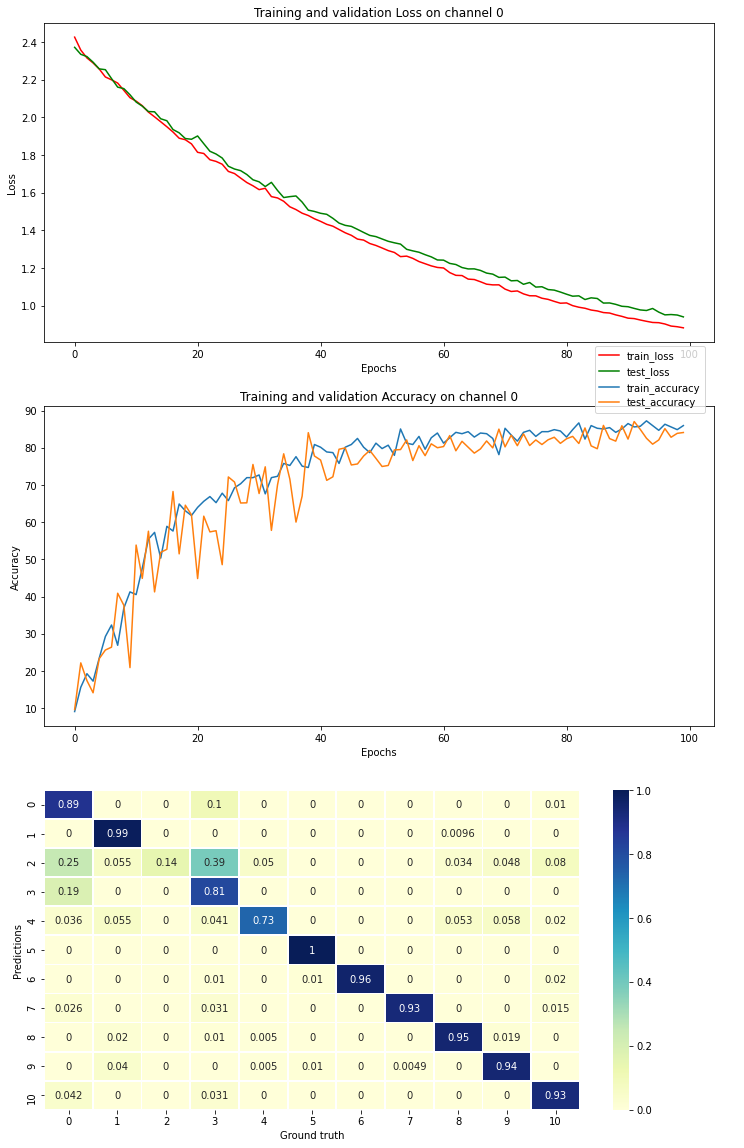

In [20]:
fig, [ax,bx,cx] = plt.subplots(3,1, figsize=(12,20))

channel = 0

x = np.arange(100)

a, = ax.plot(x, ch_train_loss[channel],color="red", label="train_loss")
b, = ax.plot(x, ch_test_loss[channel],color="green", label="test_loss")
ax.set(xlabel='Epochs',ylabel='Loss')
ax.set_title(f"Training and validation Loss on channel {channel}")

# plot accuracy

c, = bx.plot(x, ch_train_accuracy[channel], label = 'train_accuracy')
d, = bx.plot(x, ch_test_accuracy[channel], label = 'test_accuracy')
bx.set_title(f"Training and validation Accuracy on channel {channel}")
bx.set(xlabel='Epochs',ylabel='Accuracy')

conf_matr = conf[channel]/conf[channel].sum(1)
cx = sn.heatmap(conf_matr, annot=True, linewidths = .8, cmap="YlGnBu")
cx.set_ylabel('Predictions')
cx.set_xlabel('Ground truth')

plt.figlegend((a,b,c,d),("train_loss","test_loss",'train_accuracy','test_accuracy'), loc=(0.8, 0.64))

# Vote between all channels

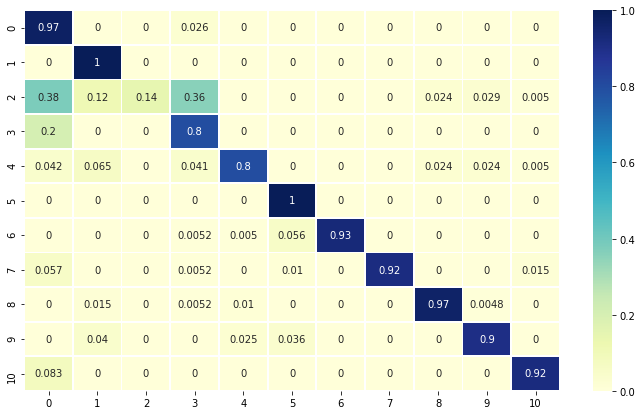

In [27]:
vote_conf = np.load(res_path+"/conf_matr_glob.npy")

fig, ax = plt.subplots(figsize=(12,7)) 
ax = sn.heatmap(vote_conf, annot=True, linewidths = .8, cmap="YlGnBu")
plt.show()